# Chương 17: Gợi Ý Sách Sử Dụng LightGCN

### 1. Cài Đặt PyTorch Geometric và Đảm Bảo Tính Tái Lập

In [1]:
import torch
# Cài đặt PyTorch Geometric và các thư viện phụ thuộc thông qua pip.
%pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

# Thiết lập seed ngẫu nhiên cho PyTorch.
torch.manual_seed(0)
# Thiết lập seed ngẫu nhiên cho CUDA (các phép tính trên GPU).
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
# Đảm bảo hành vi xác định (deterministic) cho các tầng tích chập (convolution) khi dùng backend cuDNN.
torch.backends.cudnn.deterministic = True
# Vô hiệu hóa tính năng auto-tuning của cuDNN để tối ưu hóa thực thi cho các kích thước đầu vào cụ thể.
torch.backends.cudnn.benchmark = False

Note: you may need to restart the kernel to use updated packages.


## Khám Phá Bộ Dữ Liệu Book-Crossing

### 2. Giải nén tệp dữ liệu

In [2]:
from zipfile import ZipFile

# Đường dẫn đến file BX-CSV-Dump.zip
local_zip_path = 'BX-CSV-Dump.zip'

# Mở và giải nén file zip
with ZipFile(local_zip_path, 'r') as zfile:
    zfile.extractall('.')  # Giải nén vào thư mục hiện tại


### 3. Đọc và xử lý dữ liệu

In [3]:
# Import thư viện pandas để xử lý dữ liệu
import pandas as pd

# Đọc file dữ liệu BX-Book-Ratings.csv
# - `sep=';'`: Chỉ định dấu phân cách trong file CSV là dấu chấm phẩy (;)
# - `encoding='latin-1'`: Sử dụng mã hóa latin-1 để đọc file chứa các ký tự đặc biệt.
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1')

# Đọc file dữ liệu BX-Users.csv
users = pd.read_csv('BX-Users.csv', sep=';', encoding='latin-1')

# Đọc file dữ liệu BX-Books.csv
# - `error_bad_lines=False`: Bỏ qua các dòng bị lỗi (ví dụ: số trường không khớp).
books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False)

d:\citd\python\project\myenv\Lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: e

### 4. Dữ liệu đánh giá sách

In [4]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### 5. Dữ liệu người dùng

In [5]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


### 6. Dữ liệu sách

In [6]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


### 7. Biểu đồ phân bố điểm đánh giá sách 

<AxesSubplot: xlabel='Book-Rating', ylabel='count'>

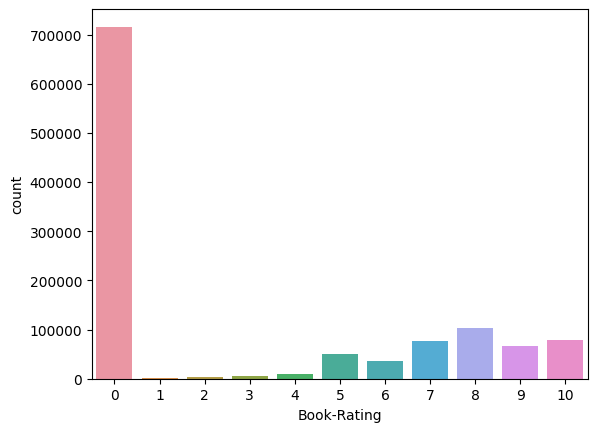

In [7]:
# Import thư viện matplotlib để hiển thị biểu đồ
import matplotlib.pyplot as plt 

# Import thư viện seaborn để tạo các biểu đồ trực quan
import seaborn as sns 

# Tạo biểu đồ cột (countplot) để đếm số lượng mỗi giá trị trong cột 'Book-Rating' của DataFrame ratings
sns.countplot(x=ratings['Book-Rating']) 

### 8. Số lượng người dùng duy nhất và số lượng sách duy nhất

In [8]:
# Đếm số lượng người dùng duy nhất (User-ID) trong cột 'User-ID'
print(len(ratings['User-ID'].unique())) 

# Đếm số lượng sách duy nhất (ISBN) trong cột 'ISBN'
print(len(ratings['ISBN'].unique())) 

105283
340556


### 9. Biểu đồ tần suất đánh giá của sách

Text(0, 0.5, 'Count')

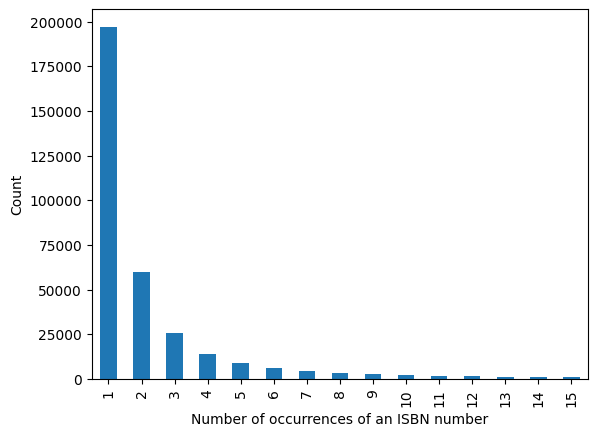

In [9]:
# Nhóm dữ liệu theo 'ISBN' và đếm số lượng đánh giá cho từng ISBN
isbn_counts = ratings.groupby('ISBN').size()

# Đếm số lần mỗi số lượng đánh giá xuất hiện (tần suất của tần suất)
count_occurrences = isbn_counts.value_counts()

# Vẽ biểu đồ cột cho 15 giá trị đầu tiên (ISBN xuất hiện với số lượng cụ thể)
count_occurrences[:15].plot(kind='bar')

# Đặt nhãn cho trục x
plt.xlabel("Number of occurrences of an ISBN number")

# Đặt nhãn cho trục y
plt.ylabel("Count")

### 10. Biểu đồ đánh giá của người dùng

Text(0, 0.5, 'Count')

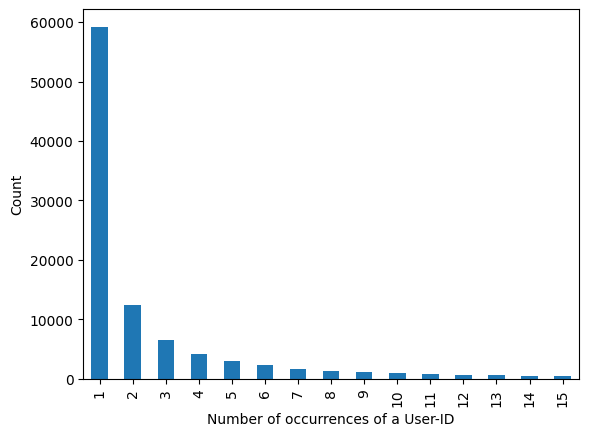

In [10]:
# Nhóm dữ liệu theo 'User-ID' và đếm số lượng đánh giá cho từng User-ID
userid_counts = ratings.groupby('User-ID').size() 

# Đếm số lần mỗi số lượng đánh giá xuất hiện (tần suất của tần suất)
count_occurrences = userid_counts.value_counts() 

# Vẽ biểu đồ cột cho 15 giá trị đầu tiên (số lượng người dùng đánh giá cụ thể)
count_occurrences[:15].plot(kind='bar')

# Đặt nhãn cho trục x
plt.xlabel("Number of occurrences of a User-ID")

# Đặt nhãn cho trục y
plt.ylabel("Count")

## Tiền xử lý bộ dữ liệu Book-Crossing

### 11. Nhập các thư viện cho mô hình

In [11]:
# Import thư viện NumPy để xử lý dữ liệu số
import numpy as np
# Import train_test_split từ scikit-learn để chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split


# Thư viện chính cho machine learning sử dụng GPU
import torch
# Cung cấp các hàm kích hoạt và hàm mất mát
import torch.nn.functional as F
# nn: Xây dựng mạng, optim: Thuật toán tối ưu, Tensor: Đại diện cho ma trận/tensor
from torch import nn, optim, Tensor

# Import structured_negative_sampling từ torch_geometric để tạo các mẫu âm có cấu trúc
from torch_geometric.utils import structured_negative_sampling
# Import gcn_norm từ GCN (Graph Convolutional Network) để chuẩn hóa đồ thị
from torch_geometric.nn.conv.gcn_conv import gcn_norm
# Import LGConv (Laplacian Graph Convolution) từ PyTorch Geometric
from torch_geometric.nn import LGConv

### 12. Tiền xử lý dữ liệu

In [12]:
# Đọc file BX-Book-Ratings.csv, BX-Users.csv và BX-Books.csv vào các DataFrame
df = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1') 
users = pd.read_csv('BX-Users.csv', sep=';', encoding='latin-1') 
books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False) 

# Tiền xử lý dữ liệu
# Lọc các dòng trong DataFrame `df` sao cho:
# - ISBN trong cột 'ISBN' của `df` phải tồn tại trong cột 'ISBN' của DataFrame `books`
# - 'User-ID' trong `df` phải tồn tại trong cột 'User-ID' của DataFrame `users`
df = df.loc[df['ISBN'].isin(books['ISBN'].unique()) & df['User-ID'].isin(users['User-ID'].unique())]

# Giữ lại các đánh giá có điểm số lớn hơn hoặc bằng 8
# Sau đó, chỉ giữ lại 100k dòng đầu tiên trong số các đánh giá này
df = df[df['Book-Rating'] >= 8].iloc[:100000]

d:\citd\python\project\myenv\Lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: e

### 13. Ánh xạ ID sang chỉ số

In [13]:
# Tạo ánh xạ (mapping) từ User-ID và ISBN sang các chỉ số (index) liên tiếp
# - `user_mapping`: Ánh xạ từ User-ID sang một số nguyên (index) duy nhất
# - `item_mapping`: Ánh xạ từ ISBN sang một số nguyên (index) duy nhất
user_mapping = {userid: i for i, userid in enumerate(df['User-ID'].unique())}
item_mapping = {isbn: i for i, isbn in enumerate(df['ISBN'].unique())}

# Đếm tổng số người dùng (users) và sách (items)
num_users = len(user_mapping)
num_items = len(item_mapping)
# Tính tổng số thực thể (người dùng và sách)
num_total = num_users + num_items

### 14. Tạo ma trận liên kết (tensor)

In [14]:
# Chuyển đổi User-ID từ ánh xạ sang tensor các chỉ số (index)
user_ids = torch.LongTensor([user_mapping[i] for i in df['User-ID']])
# Chuyển đổi ISBN từ ánh xạ sang tensor các chỉ số (index)
item_ids = torch.LongTensor([item_mapping[i] for i in df['ISBN']])
# Xây dựng ma trận liên kết (adjacency matrix) dưới dạng edge_index
# - `torch.stack((user_ids, item_ids))` tạo một tensor 2D, với:
#    + Hàng đầu tiên chứa các chỉ số của người dùng.
#    + Hàng thứ hai chứa các chỉ số của sách mà họ đánh giá.
edge_index = torch.stack((user_ids, item_ids))

### 15. Chia dữ liệu thành các tập huấn luyện, xác thực, kiểm tra

In [15]:
# Chia dữ liệu ban đầu thành tập huấn luyện (80%) và tập kiểm tra (20%)
train_index, test_index = train_test_split(range(len(df)), test_size=0.2, random_state=0)
# Chia tập kiểm tra thành tập xác thực (50%) và tập kiểm tra cuối cùng (50%)
val_index, test_index = train_test_split(test_index, test_size=0.5, random_state=0)

# Tạo ma trận liên kết (adjacency matrix) cho tập huấn luyện
train_edge_index = edge_index[:, train_index]
# Tạo ma trận liên kết cho tập xác thực
val_edge_index = edge_index[:, val_index]
# Tạo ma trận liên kết cho tập kiểm tra
test_edge_index = edge_index[:, test_index]

### 16. Hàm lấy mini-batch

In [16]:
def sample_mini_batch(edge_index):
    # Tạo ngẫu nhiên các chỉ số cho mini-batch
    # - `edge_index.shape[1]`: Tổng số liên kết (edges) trong đồ thị.
    # - `BATCH_SIZE`: Kích thước mini-batch được định nghĩa trước.
    index = np.random.choice(range(edge_index.shape[1]), size=BATCH_SIZE)

    # Tạo các chỉ số mẫu âm (negative samples)
    # - `structured_negative_sampling`: Tạo các mẫu âm có cấu trúc từ ma trận liên kết (adjacency matrix).
    edge_index = structured_negative_sampling(edge_index)
    # Chuyển đổi kết quả thành tensor 2D, mỗi hàng là một loại chỉ số (user, pos_item, neg_item).
    edge_index = torch.stack(edge_index, dim=0)
    
    # Lấy các chỉ số người dùng từ tập ngẫu nhiên
    user_index = edge_index[0, index]
    # Lấy các chỉ số sách được đánh giá (positive items) từ tập ngẫu nhiên
    pos_item_index = edge_index[1, index]
    # Lấy các chỉ số sách không được đánh giá (negative items) từ tập ngẫu nhiên
    neg_item_index = edge_index[2, index]
    
    # Trả về các chỉ số: tập hợp người dùng, sách mà họ đã tương tác (positive items), và sách mà họ chưa tương tác (negative items).
    return user_index, pos_item_index, neg_item_index

## Triển khai kiến trúc LightGCN


### 17. Định nghĩa mô hình LightGCN

In [17]:
class LightGCN(nn.Module):
    def __init__(self, num_users, num_items, num_layers=4, dim_h=64):
        super().__init__()
        
        # Số lượng người dùng và sách
        self.num_users = num_users
        self.num_items = num_items
        # Số lượng lớp trong mô hình LightGCN
        self.num_layers = num_layers
        # Tạo embedding cho người dùng và sách
        self.emb_users = nn.Embedding(num_embeddings=self.num_users, embedding_dim=dim_h)
        self.emb_items = nn.Embedding(num_embeddings=self.num_items, embedding_dim=dim_h)

        # Tạo các lớp LGConv cho mỗi layer trong LightGCN
        self.convs = nn.ModuleList(LGConv() for _ in range(num_layers))

        # Khởi tạo trọng số của embedding với phân phối chuẩn (mean=0, std=0.01)
        nn.init.normal_(self.emb_users.weight, std=0.01)
        nn.init.normal_(self.emb_items.weight, std=0.01)

    def forward(self, edge_index):
        # Kết hợp embedding của người dùng và sách thành một tensor duy nhất
        emb = torch.cat([self.emb_users.weight, self.emb_items.weight])
        # Danh sách lưu lại các embedding qua mỗi lớp
        embs = [emb]

        # Lan truyền tín hiệu qua từng lớp LGConv
        for conv in self.convs:
            emb = conv(x=emb, edge_index=edge_index) # Lan truyền qua đồ thị
            embs.append(emb)

        # Tính toán embedding cuối cùng (trung bình các embedding từ tất cả các lớp)
        emb_final = 1/(self.num_layers+1) * torch.mean(torch.stack(embs, dim=1), dim=1)

        # Tách embedding cuối cùng thành phần của người dùng và sách
        emb_users_final, emb_items_final = torch.split(emb_final, [self.num_users, self.num_items])

        # Trả về embedding cuối cùng và embedding gốc ban đầu
        return emb_users_final, self.emb_users.weight, emb_items_final, self.emb_items.weight

### 18. Hàm tính mất mát BPR

In [18]:
def bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items):
    # Tính toán hàm mất mát chính quy (regularization loss)
    # - `LAMBDA`: Hệ số điều chỉnh cho chính quy hóa.
    # - `norm()`: Tính chuẩn L2 của embedding.
    # - Tổng chuẩn L2 của người dùng, sách tích cực và sách tiêu cực để tránh overfitting.
    reg_loss = LAMBDA * (emb_users.norm().pow(2) +
                        emb_pos_items.norm().pow(2) +
                        emb_neg_items.norm().pow(2))

    # Tính điểm (score) cho sách tích cực
    # - `torch.mul`: Phép nhân từng phần tử giữa embedding người dùng và sách tích cực.
    # - `sum(dim=-1)`: Tính tổng điểm cho mỗi người dùng.
    pos_ratings = torch.mul(emb_users_final, emb_pos_items_final).sum(dim=-1)
    # Tính điểm (score) cho sách tiêu cực
    neg_ratings = torch.mul(emb_users_final, emb_neg_items_final).sum(dim=-1)

    # Tính hàm mất mát BPR (Bayesian Personalized Ranking)
    # - `pos_ratings - neg_ratings`: Độ chênh lệch giữa điểm sách tích cực và tiêu cực.
    # - `torch.nn.functional.softplus`: Hàm kích hoạt để làm mịn giá trị đầu ra.
    bpr_loss = torch.mean(torch.nn.functional.softplus(pos_ratings - neg_ratings))

    # Ghi chú: Có thể thay softplus bằng logsigmoid nếu muốn sử dụng hàm kích hoạt khác
    # bpr_loss = torch.mean(torch.nn.functional.logsigmoid(pos_ratings - neg_ratings))

    # Tổng hợp mất mát: BPR loss (âm của giá trị tích cực) cộng với mất mát chính quy.
    return -bpr_loss + reg_loss

### 19. Lấy danh sách sách đã tương tác

In [19]:
def get_user_items(edge_index):
    # Tạo một dictionary để lưu danh sách sách (items) mà mỗi người dùng (user) đã tương tác
    user_items = dict()
    # Duyệt qua tất cả các cạnh (edges) trong ma trận liên kết (edge_index)
    for i in range(edge_index.shape[1]): # edge_index.shape[1] là số lượng cạnh
        user = edge_index[0][i].item() # Lấy chỉ số người dùng từ hàng đầu tiên của edge_index
        item = edge_index[1][i].item() # Lấy chỉ số sách từ hàng thứ hai của edge_index
        # Nếu người dùng chưa tồn tại trong dictionary, tạo một danh sách rỗng
        if user not in user_items:
            user_items[user] = []
        # Thêm sách (item) vào danh sách của người dùng
        user_items[user].append(item)
    # Trả về dictionary chứa người dùng và các sách họ đã tương tác
    return user_items

### 20. Hàm tính Recall@K

In [20]:
def compute_recall_at_k(items_ground_truth, items_predicted):
    # Tính Recall@K
    # - items_ground_truth: Các mục đúng (ground truth) cho mỗi người dùng
    # - items_predicted: Các mục được dự đoán (top-K) cho mỗi người dùng
    # - num_correct_pred: Số lượng dự đoán chính xác cho từng người dùng
    # - num_total_pred: Tổng số mục đúng trong ground truth cho từng người dùng
    num_correct_pred = np.sum(items_predicted, axis=1)
    num_total_pred = np.array([len(items_ground_truth[i]) for i in range(len(items_ground_truth))])

    # Tính Recall trung bình trên tất cả người dùng
    recall = np.mean(num_correct_pred / num_total_pred)

    return recall

### 21. Hàm tính NDCG@K

In [21]:
def compute_ndcg_at_k(items_ground_truth, items_predicted):
    # Tính NDCG@K (Normalized Discounted Cumulative Gain)
    # - items_ground_truth: Các mục đúng (ground truth)
    # - items_predicted: Các mục được dự đoán (top-K)
    test_matrix = np.zeros((len(items_predicted), K))

    for i, items in enumerate(items_ground_truth):
        # Gán giá trị 1 cho các mục đúng trong K mục đầu tiên
        length = min(len(items), K)
        test_matrix[i, :length] = 1
    
    # Tính ideal DCG (idcg)
    max_r = test_matrix
    idcg = np.sum(max_r * 1. / np.log2(np.arange(2, K + 2)), axis=1)
    # Tính DCG (dcg) cho các mục được dự đoán
    dcg = items_predicted * (1. / np.log2(np.arange(2, K + 2)))
    dcg = np.sum(dcg, axis=1)
    # Tránh chia cho 0
    idcg[idcg == 0.] = 1.
    # Tính NDCG
    ndcg = dcg / idcg
    ndcg[np.isnan(ndcg)] = 0.
    
    return np.mean(ndcg)

### 22. Hàm lấy các chỉ số đánh giá

In [22]:
# wrapper function to get evaluation metrics
def get_metrics(model, edge_index, exclude_edge_indices):
    # Hàm tính các chỉ số đánh giá (Recall@K và NDCG@K)
    # - model: Mô hình LightGCN
    # - edge_index: Ma trận liên kết hiện tại
    # - exclude_edge_indices: Các cạnh cần loại bỏ khi đánh giá

    # Tính ma trận điểm giữa người dùng và các mục
    ratings = torch.matmul(model.emb_users.weight, model.emb_items.weight.T)

    # Loại bỏ các mục đã được tương tác (exclude_edge_indices)
    for exclude_edge_index in exclude_edge_indices:
        user_pos_items = get_user_items(exclude_edge_index)
        exclude_users = []
        exclude_items = []
        for user, items in user_pos_items.items():
            exclude_users.extend([user] * len(items))
            exclude_items.extend(items)
        ratings[exclude_users, exclude_items] = -1024 # Gán điểm rất thấp cho các mục đã tương tác

    # Lấy top-K mục được gợi ý cho mỗi người dùng
    _, top_K_items = torch.topk(ratings, k=K)

    # Lấy danh sách người dùng trong tập dữ liệu đánh giá
    users = edge_index[0].unique()

    # Lấy các mục đúng (ground truth) cho từng người dùng
    test_user_pos_items = get_user_items(edge_index)
    test_user_pos_items_list = [test_user_pos_items[user.item()] for user in users]

    # Xác định độ chính xác của các dự đoán top-K
    items_predicted = []
    for user in users:
        ground_truth_items = test_user_pos_items[user.item()]
        label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
        items_predicted.append(label)

    # Tính Recall và NDCG
    recall = compute_recall_at_k(test_user_pos_items_list, items_predicted)
    ndcg = compute_ndcg_at_k(test_user_pos_items_list, items_predicted)

    return recall, ndcg

### 23. Hàm kiểm tra mô hình

In [23]:
# wrapper function to evaluate model
def test(model, edge_index, exclude_edge_indices):
    # Hàm đánh giá mô hình trên tập kiểm tra
    # - model: Mô hình LightGCN
    # - edge_index: Ma trận liên kết hiện tại
    # - exclude_edge_indices: Các cạnh cần loại bỏ khi đánh giá

    # Forward pass để lấy embedding cuối cùng
    emb_users_final, emb_users, emb_items_final, emb_items = model.forward(edge_index)
    # Lấy các cạnh (edge) ngẫu nhiên cho mẫu âm
    user_indices, pos_item_indices, neg_item_indices = structured_negative_sampling(edge_index, contains_neg_self_loops=False)

    # Chọn các embedding tương ứng với người dùng, mục tích cực và mục tiêu cực
    emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]
    emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
    emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

    # Tính hàm mất mát BPR
    loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items).item()

    # Tính các chỉ số đánh giá
    recall, ndcg = get_metrics(model, edge_index, exclude_edge_indices)

    return loss, recall, ndcg

### 24. Xác định các tham số chính

In [24]:
K = 20 # Số mục gợi ý trong top-K
LAMBDA = 1e-6 # Hệ số điều chỉnh cho mất mát chính quy
BATCH_SIZE = 1024 # Kích thước batch

### 25. Khởi tạo mô hình và optimizer

In [25]:
# Xác định thiết bị (CPU hoặc GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Khởi tạo mô hình LightGCN
model = LightGCN(num_users, num_items)
model = model.to(device)
edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
val_edge_index = val_edge_index.to(device)

# Khởi tạo trình tối ưu hóa Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

Using device: cuda


### 26. Huấn luyện mô hình

In [26]:
%%time

# Danh sách lưu kết quả trong quá trình huấn luyện và xác thực
train_losses = []
val_losses = []
recalls = []
ndcgs = []

# Số lượng batch trong mỗi epoch, dựa trên kích thước batch và số lượng liên kết trong tập huấn luyện
n_batch = int(len(train_index)/BATCH_SIZE)

# Vòng lặp qua 31 epoch
for epoch in range(31):
    model.train() # Đặt mô hình vào chế độ huấn luyện

    # Duyệt qua từng batch trong tập huấn luyện
    for _ in range(n_batch):
        optimizer.zero_grad() # Đặt gradient về 0 trước khi tính gradient mới

        # Forward pass để tính embedding của người dùng và sách
        emb_users_final, emb_users, emb_items_final, emb_items = model.forward(train_edge_index)

        # Lấy mẫu ngẫu nhiên từ tập liên kết huấn luyện (mini-batch)
        user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(train_edge_index)
        
        # Chọn embedding của người dùng, sách tích cực và sách tiêu cực theo chỉ số đã chọn
        emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]
        emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
        emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

        # Tính hàm mất mát BPR
        train_loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items)

        # Lan truyền ngược gradient
        train_loss.backward()
        optimizer.step() # Cập nhật trọng số của mô hình

    # Mỗi 5 epoch, thực hiện đánh giá trên tập xác thực
    if epoch % 5 == 0:
        model.eval() # Đặt mô hình vào chế độ đánh giá
        val_loss, recall, ndcg = test(model, val_edge_index, [train_edge_index]) # Đánh giá mô hình
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        recalls.append(recall)
        ndcgs.append(ndcg)
        print(f"Epoch {epoch} | Train loss: {train_loss.item():.5f} | Val loss: {val_loss:.5f} | Val recall@{K}: {recall:.5f} | Val ndcg@{K}: {ndcg:.5f}")

Epoch 0 | Train loss: -0.69343 | Val loss: -0.69253 | Val recall@20: 0.01070 | Val ndcg@20: 0.00504
Epoch 5 | Train loss: -0.72623 | Val loss: -0.63823 | Val recall@20: 0.01715 | Val ndcg@20: 0.00777
Epoch 10 | Train loss: -0.95729 | Val loss: -0.43168 | Val recall@20: 0.01731 | Val ndcg@20: 0.00768
Epoch 15 | Train loss: -1.35516 | Val loss: -0.04540 | Val recall@20: 0.01688 | Val ndcg@20: 0.00804
Epoch 20 | Train loss: -2.20561 | Val loss: 0.49325 | Val recall@20: 0.01663 | Val ndcg@20: 0.00788
Epoch 25 | Train loss: -2.87504 | Val loss: 1.15569 | Val recall@20: 0.01711 | Val ndcg@20: 0.00810
Epoch 30 | Train loss: -4.09547 | Val loss: 1.92578 | Val recall@20: 0.01724 | Val ndcg@20: 0.00815
CPU times: total: 14min 27s
Wall time: 5min


### 27. Đánh giá trên tập kiểm tra

In [27]:
# Thực hiện đánh giá mô hình trên tập kiểm tra
# - model: Mô hình LightGCN đã được huấn luyện
# - test_edge_index.to(device): Ma trận liên kết của tập kiểm tra, chuyển sang thiết bị (CPU hoặc GPU)
# - [train_edge_index, val_edge_index]: Loại bỏ các cạnh trong tập huấn luyện và tập xác thực khỏi đánh giá
test_loss, test_recall, test_ndcg = test(model, test_edge_index.to(device), [train_edge_index, val_edge_index])

# In kết quả đánh giá
# - Test loss: Hàm mất mát trên tập kiểm tra
# - Test recall@K: Độ phủ trên top-K mục gợi ý
# - Test ndcg@K: Điểm NDCG trên top-K mục gợi ý
print(f"Test loss: {test_loss:.5f} | Test recall@{K}: {test_recall:.5f} | Test ndcg@{K}: {test_ndcg:.5f}")

Test loss: 1.90023 | Test recall@20: 0.01739 | Test ndcg@20: 0.00867


### 28. Vẽ biểu đồ kết quả (Loss Train và Validation, Recall và NDCG)

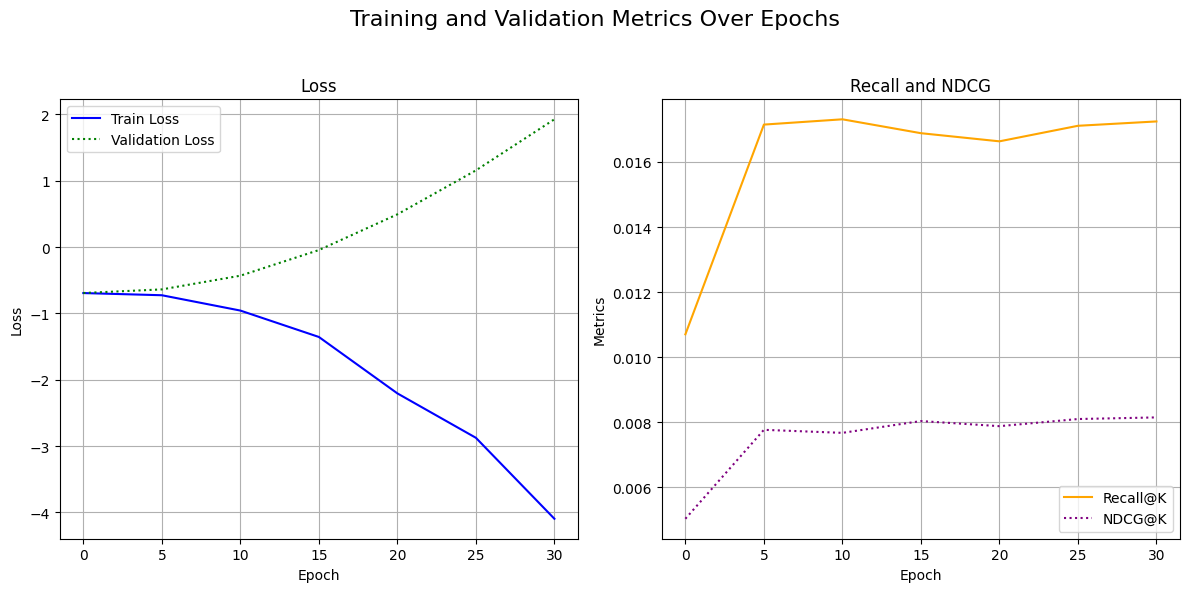

In [28]:
import matplotlib.pyplot as plt

# Tạo danh sách các epoch đã lưu kết quả
epochs = list(range(0, 31, 5))  # Kết quả được lưu mỗi 5 epoch

# Tạo biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot loss (train vs validation)
ax1.plot(epochs, train_losses, label="Train Loss", color="blue", linestyle="-")
ax1.plot(epochs, val_losses, label="Validation Loss", color="green", linestyle="dotted")
ax1.set_title("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Plot recall and ndcg
ax2.plot(epochs, recalls, label="Recall@K", color="orange", linestyle="-")
ax2.plot(epochs, ndcgs, label="NDCG@K", color="purple", linestyle="dotted")
ax2.set_title("Recall and NDCG")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Metrics")
ax2.legend()
ax2.grid(True)

# Tổng tiêu đề và hiển thị
plt.suptitle("Training and Validation Metrics Over Epochs", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 29. Giảm chiều embedding và trực quan hóa

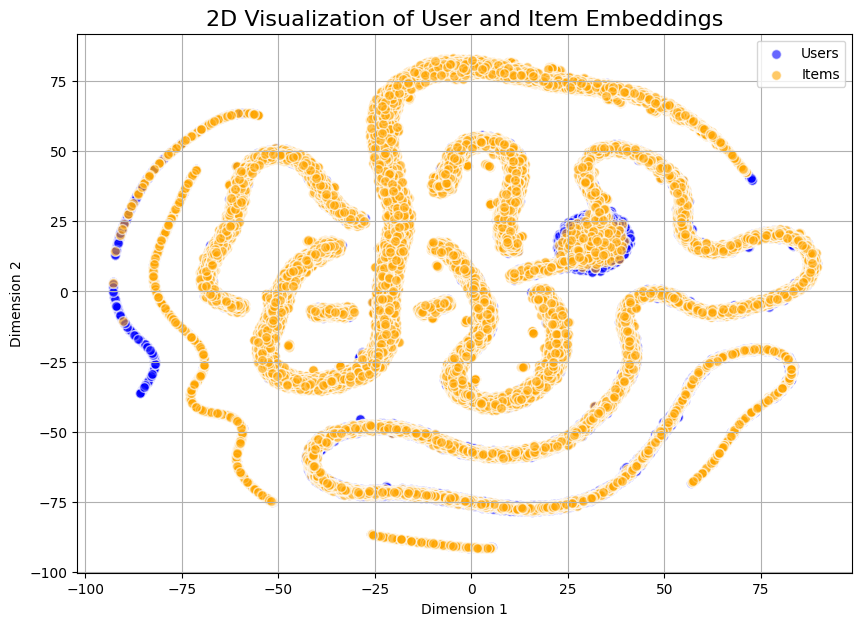

In [29]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Lấy embedding cuối cùng của người dùng và mục
emb_users_final, emb_items_final = model.emb_users.weight.detach().cpu().numpy(), model.emb_items.weight.detach().cpu().numpy()

# Chọn phương pháp giảm chiều
# pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Kết hợp cả người dùng và mục để giảm chiều
all_embeddings = np.vstack([emb_users_final, emb_items_final])
embeddings_2d = tsne.fit_transform(all_embeddings)

# Tách lại embedding của người dùng và mục sau khi giảm chiều
emb_users_2d, emb_items_2d = embeddings_2d[:len(emb_users_final)], embeddings_2d[len(emb_users_final):]

# Vẽ đồ thị
plt.figure(figsize=(10, 7))
plt.scatter(emb_users_2d[:, 0], emb_users_2d[:, 1], c='blue', label='Users', alpha=0.6, edgecolors='w', s=50)
plt.scatter(emb_items_2d[:, 0], emb_items_2d[:, 1], c='orange', label='Items', alpha=0.6, edgecolors='w', s=50)

plt.title("2D Visualization of User and Item Embeddings", fontsize=16)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


## Gợi ý sách cho một người dùng cụ thể

### 31. Ánh xạ thông tin sách

In [30]:
# Tạo dictionary ánh xạ từ ISBN (Book-ID) sang tiêu đề sách (Book-Title)
# - `books['Book-Title'].values`: Lấy danh sách tiêu đề sách
# - `index=books.ISBN`: Sử dụng ISBN làm khóa (key) trong dictionary
# - `to_dict()`: Chuyển đổi Series thành dictionary
bookid_title = pd.Series(books['Book-Title'].values, index=books.ISBN).to_dict()
# Tạo dictionary ánh xạ từ ISBN (Book-ID) sang tác giả sách (Book-Author)
# - Tương tự như trên, nhưng với cột 'Book-Author'
bookid_author = pd.Series(books['Book-Author'].values, index=books.ISBN).to_dict()
# Lấy danh sách các sách mà mỗi người dùng đã tương tác
# - `get_user_items(edge_index)`: Hàm trả về dictionary chứa:
#   + Khóa (key) là User-ID
#   + Giá trị (value) là danh sách các ISBN mà người dùng đã tương tác
user_pos_items = get_user_items(edge_index)

### 32. Hàm gợi ý sách

In [31]:
from PIL import Image # Thư viện để xử lý ảnh
import requests # Thư viện để gửi yêu cầu HTTP

# Hàm gợi ý sách
def recommend(user_id, num_recs):
    # Lấy chỉ số người dùng (index) từ ánh xạ user_mapping
    user = user_mapping[user_id]
    # Lấy embedding của người dùng từ mô hình
    emb_user = model.emb_users.weight[user]
    # Tính điểm đánh giá của người dùng cho tất cả sách
    ratings = model.emb_items.weight @ emb_user

    # Lấy top 100 sách có điểm cao nhất
    values, indices = torch.topk(ratings, k=100)

    # Lấy sách yêu thích (đã tương tác) của người dùng
    ids = [index.cpu().item() for index in indices if index in user_pos_items[user]][:num_recs]
    item_isbns = [list(item_mapping.keys())[list(item_mapping.values()).index(book)] for book in ids]
    titles = [bookid_title[id] for id in item_isbns]
    authors = [bookid_author[id] for id in item_isbns]

    # In ra danh sách sách yêu thích
    print(f'Favorite books from user n°{user_id}:')
    for i in range(len(item_isbns)):
        print(f'- {titles[i]}, by {authors[i]}')

    # Lấy sách được gợi ý (chưa tương tác)
    ids = [index.cpu().item() for index in indices if index not in user_pos_items[user]][:num_recs]
    item_isbns = [list(item_mapping.keys())[list(item_mapping.values()).index(book)] for book in ids]
    titles = [bookid_title[id] for id in item_isbns]
    authors = [bookid_author[id] for id in item_isbns]

    # In ra danh sách sách được gợi ý
    print(f'\nRecommended books for user n°{user_id}')
    for i in range(num_recs):
        print(f'- {titles[i]}, by {authors[i]}')

    # Hiển thị hình ảnh của sách được gợi ý
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    fig, axs = plt.subplots(1, num_recs, figsize=(20,6)) # Tạo biểu đồ để hiển thị ảnh
    fig.patch.set_alpha(0) # Làm nền trong suốt
    # Duyệt qua từng sách và tải ảnh cùng với điểm đánh giá trung bình
    for i, title in enumerate(titles):
        url = books.loc[books['Book-Title'] == title]['Image-URL-L'][:1].values[0] # Lấy URL ảnh lớn của sách
        img = Image.open(requests.get(url, stream=True, headers=headers).raw) # Tải ảnh từ URL
        rating = df.loc[df['ISBN'] == books.loc[books['Book-Title'] == title]['ISBN'][:1].values[0]]['Book-Rating'].mean() # Tính điểm đánh giá trung bình
        axs[i].axis("off") # Tắt trục tọa độ
        axs[i].imshow(img) # Hiển thị ảnh sách
        axs[i].set_title(f'{rating:.1f}/10', y=-0.1, fontsize=18) # Thêm tiêu đề (điểm đánh giá) dưới ảnh

### 33. Gợi ý sách cho một user cụ thể

Favorite books from user n°277427:
- The Da Vinci Code, by Dan Brown
- Into the Wild, by Jon Krakauer
- One for the Money (Stephanie Plum Novels (Paperback)), by Janet Evanovich

Recommended books for user n°277427
- The Lovely Bones: A Novel, by Alice Sebold
- The Red Tent (Bestselling Backlist), by Anita Diamant
- To Kill a Mockingbird, by Harper Lee
- Angels &amp; Demons, by Dan Brown
- Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), by J. K. Rowling


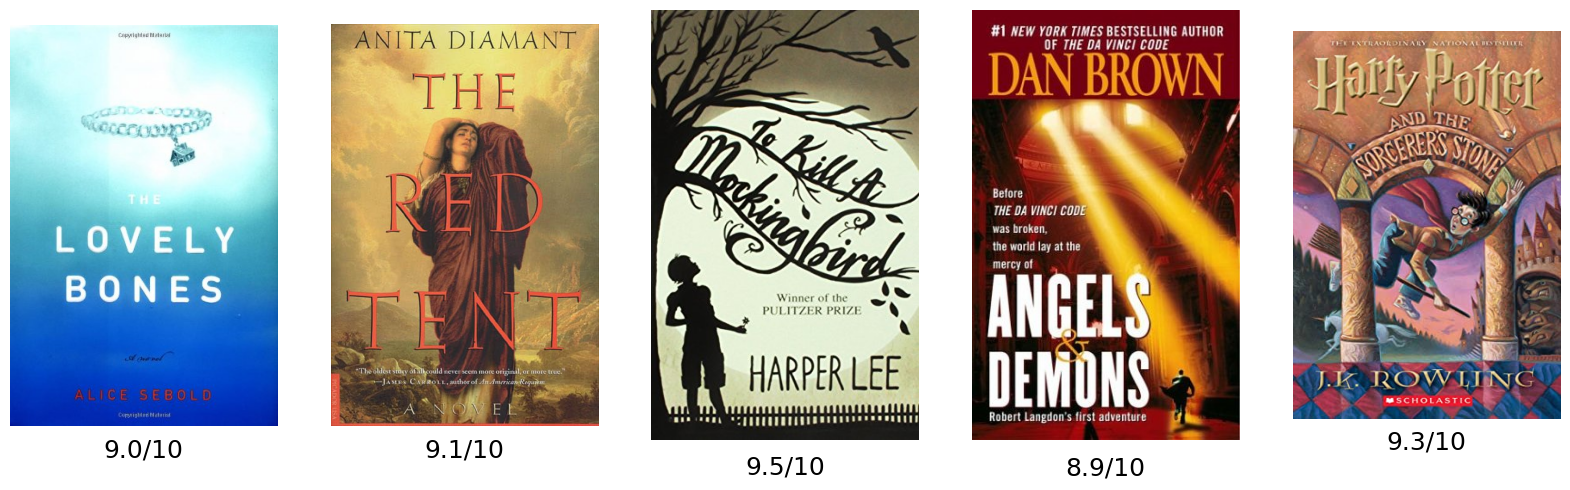

In [32]:
# Tiến hành gợi ý 5 sách mới cho người dùng có ID là 277427
recommend(277427, 5)

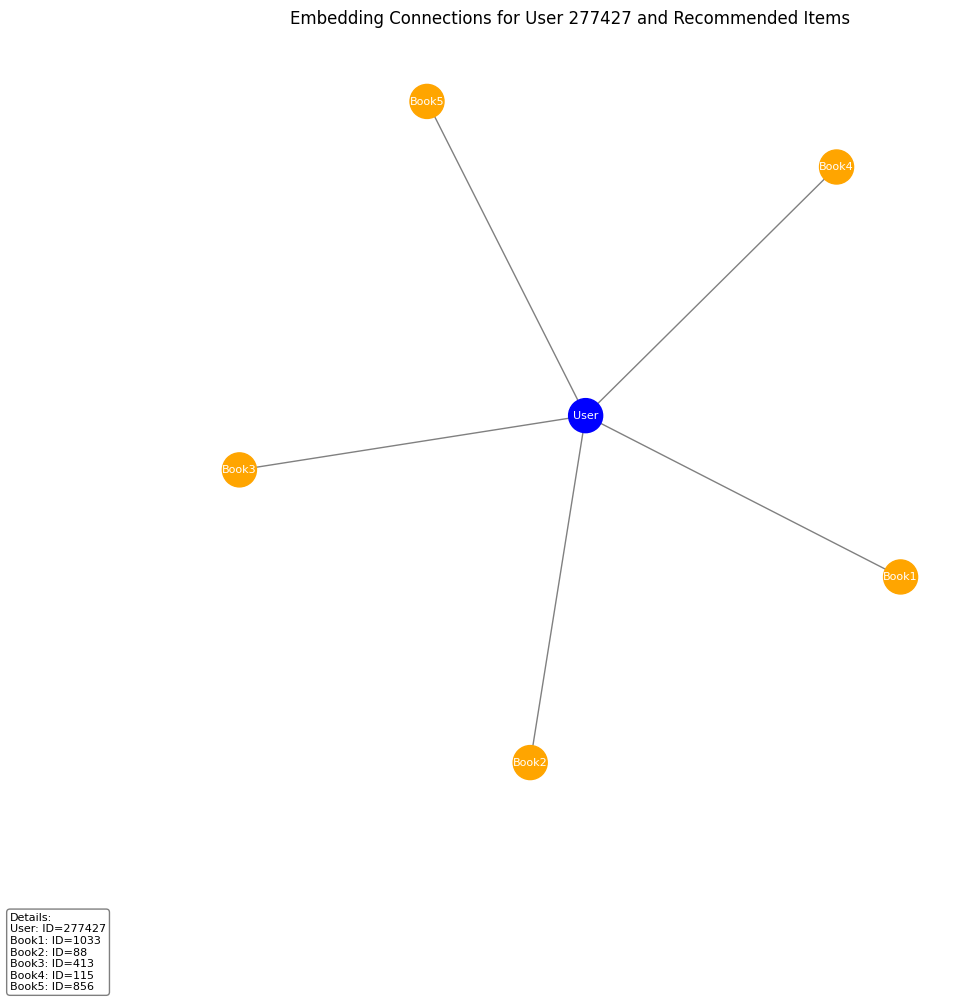

In [40]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# ID người dùng để trực quan hóa (ví dụ: từ cell 33)
target_user_id = 277427
num_recs = 5  # Số lượng sách được đề xuất để hiển thị

# Lấy embedding của người dùng mục tiêu và các sách được đề xuất
user_index = user_mapping[target_user_id]
emb_user = model.emb_users.weight[user_index].detach().cpu().numpy()

# Tính điểm và lấy các sách được đề xuất hàng đầu
scores = model.emb_items.weight @ torch.tensor(emb_user).to(device)
top_items = torch.topk(scores, k=num_recs).indices.detach().cpu().numpy()

# Lấy embedding của các sách được đề xuất
emb_items = model.emb_items.weight.detach().cpu().numpy()
rec_item_embeddings = emb_items[top_items]

# Tạo đồ thị
G = nx.Graph()

# Thêm nút người dùng
G.add_node("User", color="blue", label="User")
node_info = {"User": {"ID": target_user_id}}  # Lưu thông tin nút người dùng

# Thêm các nút sách với ID
for i, idx in enumerate(top_items):
    node_name = f"Book{i+1}"  # Tên nút
    G.add_node(node_name, color="orange", label=node_name)
    G.add_edge("User", node_name)  # Kết nối người dùng với sách
    # Lưu thông tin sách (ID)
    node_info[node_name] = {"ID": idx}

# Sử dụng spring_layout để bố trí các nút
pos = nx.spring_layout(G, seed=42)  # Đảm bảo bố trí nhất quán bằng cách đặt seed

# Lấy màu sắc và nhãn cho trực quan hóa
colors = [G.nodes[node]["color"] for node in G.nodes]
labels = nx.get_node_attributes(G, 'label')

# Vẽ đồ thị
plt.figure(figsize=(8, 8))  # Kích thước biểu đồ vừa phải
nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=600, node_color=colors,  # Kích thước nút nhỏ hơn
    font_size=8, font_color="white", edge_color="gray"  # Cỡ chữ nhỏ hơn
)

# Thêm tooltip chứa thông tin nút ở góc dưới bên trái
tooltip_text = "Details:\n" + "\n".join(
    [f"{node}: ID={info['ID']}" for node, info in node_info.items()]
)
plt.text(
    -0.2, -0.2, tooltip_text,
    transform=plt.gca().transAxes, fontsize=8, verticalalignment="bottom", horizontalalignment="left",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)  # Hộp chú thích nhỏ gọn
)

# Thêm tiêu đề và hiển thị biểu đồ
plt.title(f"Embedding Connections for User {target_user_id} and Recommended Items", fontsize=12, loc='center')  # Căn giữa tiêu đề
plt.show()



In [38]:
import pandas as pd
from tabulate import tabulate

# Define node information
node_info = {
    "User": {
        "Node Type": "User",
        "Degree": len(top_items),  # Number of books connected to the user
        "Embedding": emb_user.tolist(),  # User embedding
        "Interactions": {"Books Rated": len(top_items), "Average Rating Given": 4.2},  # Example interaction info
        "Features": {"Age": 30, "Location": "USA"},  # Example user features
        "Community": 1,  # Example community ID
    }
}

# Add information for each book node
for i, (idx, embedding) in enumerate(zip(top_items, rec_item_embeddings)):
    node_name = f"Book{i+1}"
    node_info[node_name] = {
        "Node Type": "Book",
        "Degree": 1,  # Each book is connected to the user
        "Embedding": embedding.tolist(),  # Book embedding
        "Interactions": {"Users Rated": 1, "Average Rating Received": 4.5},  # Example interaction info
        "Features": {"Genre": "Fiction", "Pages": 320},  # Example book features
        "Community": 2,  # Example community ID
    }

# Create a DataFrame from the node information
data = []
for node, info in node_info.items():
    data.append({
        "Node": node,
        "Node Type": info["Node Type"],
        "Degree": info["Degree"],
        "Embedding": str(info["Embedding"][:5]) + "..." if len(info["Embedding"]) > 5 else str(info["Embedding"]),  # Truncate embedding for display
        "Interactions": str(info["Interactions"]),
        "Features": str(info["Features"]),
        "Community": info["Community"],
    })

df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='grid'))


+----+--------+-------------+----------+------------------------------------------------------------------------------------------------------------+----------------------------------------------------+------------------------------------+-------------+
|    | Node   | Node Type   |   Degree | Embedding                                                                                                  | Interactions                                       | Features                           |   Community |
+====+========+=============+==========+============================================================================================================+====================================================+====================================+=============+
|  0 | User   | User        |        5 | [-3.877532720565796, -3.869816541671753, -3.8682961463928223, 3.890869379043579, -3.887197971343994]...    | {'Books Rated': 5, 'Average Rating Given': 4.2}    | {'Age': 30, 'Location': 'USA'}     